In [1]:
from matplotlib import pyplot as plt

import fastf1
import fastf1.plotting

In [2]:
session = fastf1.get_session(2024, "Suzuka", 'R')
session.load()
laps = session.laps

req         WARNING 	DEFAULT CACHE ENABLED! (24.0 KB) /Users/bolt/Library/Caches/fastf1
core           INFO 	Loading data for Japanese Grand Prix - Race [v3.4.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track statu

In [13]:
drivers = session.drivers
drivers

['1',
 '11',
 '55',
 '16',
 '4',
 '14',
 '63',
 '81',
 '44',
 '22',
 '27',
 '18',
 '20',
 '77',
 '31',
 '10',
 '2',
 '24',
 '3',
 '23']

In [14]:
drivers = [session.get_driver(driver)["Abbreviation"] for driver in drivers]
drivers

['VER',
 'PER',
 'SAI',
 'LEC',
 'NOR',
 'ALO',
 'RUS',
 'PIA',
 'HAM',
 'TSU',
 'HUL',
 'STR',
 'MAG',
 'BOT',
 'OCO',
 'GAS',
 'SAR',
 'ZHO',
 'RIC',
 'ALB']

In [15]:
stints = laps[["Driver", "Stint", "Compound", "LapNumber"]]
stints = stints.groupby(["Driver", "Stint", "Compound"])
stints = stints.count().reset_index()

In [16]:
stints = stints.rename(columns={"LapNumber": "StintLength"})
stints

,Driver,Stint,Compound,StintLength
0,ALB,1.0,SOFT,1
1,ALO,1.0,SOFT,1
2,ALO,2.0,SOFT,12
3,ALO,3.0,MEDIUM,20
4,ALO,4.0,HARD,20
...,...,...,...,...
69,VER,4.0,HARD,19
70,ZHO,1.0,MEDIUM,1
71,ZHO,2.0,SOFT,6
72,ZHO,3.0,HARD,4


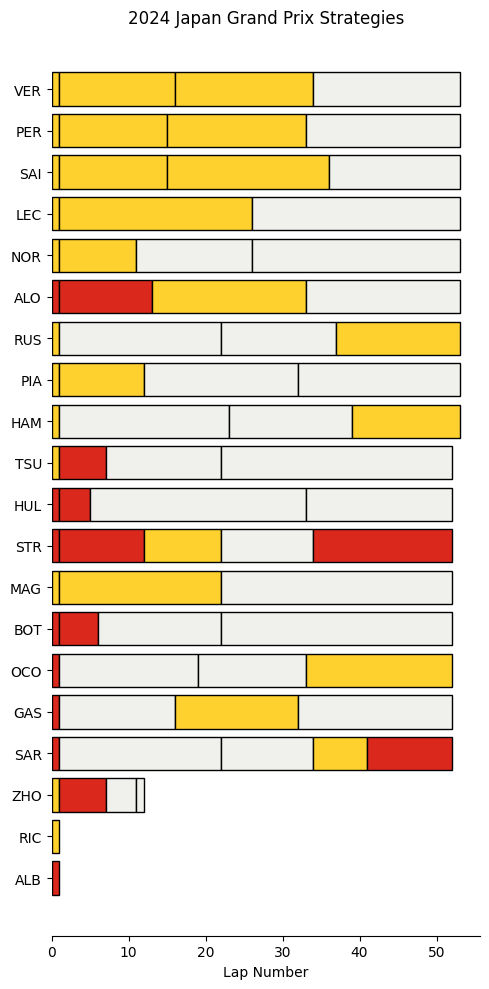

In [18]:
fig, ax = plt.subplots(figsize=(5, 10))

for driver in drivers:
    driver_stints = stints.loc[stints["Driver"] == driver]

    previous_stint_end = 0
    for idx, row in driver_stints.iterrows():

        plt.barh(
            y=driver,
            width=row["StintLength"],
            left=previous_stint_end,
            color=fastf1.plotting.COMPOUND_COLORS[row["Compound"]],
            edgecolor="black",
            fill=True
        )

        previous_stint_end += row["StintLength"]

plt.title("2024 Japan Grand Prix Strategies")
plt.xlabel("Lap Number")
plt.grid(False)

ax.invert_yaxis()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

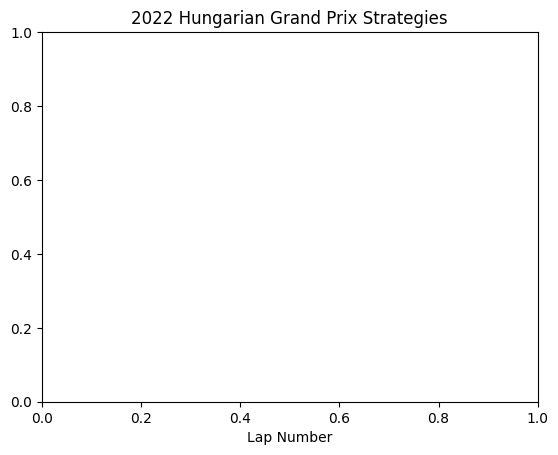